In [135]:
from math import sqrt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas.plotting._matplotlib import lag_plot
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import acf, pacf, adfuller, grangercausalitytests
import pmdarima as pm

In [52]:
mySet = pd.read_csv('dataset1.csv', parse_dates=[[3, 4, 5]])
mySet.head()

,year_mo_da,Unnamed: 0,stn,wban,temp,count_temp,dewp,count_dewp,slp,count_slp,...,flag_min,prcp,flag_prcp,sndp,fog,rain_drizzle,snow_ice_pellets,hail,thunder,tornado_funnel_cloud
0,1946-08-14,0,722530,12921,86.4,18,71.4,18,1013.4,18,...,*,0.0,I,999.9,0,0,0,0,0,0
1,1946-08-15,1,722530,12921,85.3,23,71.9,23,1015.0,23,...,*,0.0,I,999.9,0,0,0,0,0,0
2,1946-08-16,2,722530,12921,85.8,24,72.4,24,1017.0,24,...,*,0.0,I,999.9,0,0,0,0,0,0
3,1946-08-17,3,722530,12921,86.0,24,71.0,24,1016.6,24,...,*,0.0,I,999.9,0,0,0,0,0,0
4,1946-08-18,4,722530,12921,86.0,24,72.0,24,1015.2,24,...,*,0.0,I,999.9,0,0,0,0,0,0


In [53]:
mySet = mySet.drop(['Unnamed: 0', 'stn', 'wban', 'count_dewp', 'count_slp', 'count_stp', 'count_temp', 'count_visib', 'count_wdsp', 'gust', 'flag_max', 'flag_min', 'flag_prcp', 'fog', 'tornado_funnel_cloud', 'thunder', 'sndp', 'rain_drizzle', 'snow_ice_pellets', 'hail', 'prcp'], axis=1)
mySet.head()

,year_mo_da,temp,dewp,slp,stp,visib,wdsp,mxpsd,max,min
0,1946-08-14,86.4,71.4,1013.4,986.1,14.9,9.9,16.9,98.2,77.4
1,1946-08-15,85.3,71.9,1015.0,987.6,14.7,12.0,26.0,98.2,76.3
2,1946-08-16,85.8,72.4,1017.0,989.6,14.5,10.1,22.0,98.2,76.3
3,1946-08-17,86.0,71.0,1016.6,989.2,14.4,7.5,15.9,98.2,75.4
4,1946-08-18,86.0,72.0,1015.2,987.8,14.5,8.0,15.0,97.3,76.3


In [54]:
mySet.set_index('year_mo_da', inplace=True)
mySet.describe()

,temp,dewp,slp,stp,visib,wdsp,mxpsd,max,min
count,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.00000,27993.000000,27993.000000,27993.000000
mean,68.803194,55.357897,1015.696763,1552.160372,11.090544,7.71933,14.458182,87.360204,59.066034
std,13.664299,15.117477,5.663415,2186.468510,3.327589,2.75225,21.662064,244.719374,85.338190
min,15.700000,-10.100000,989.600000,0.000000,0.400000,0.00000,4.100000,21.900000,0.000000
25%,58.800000,44.400000,1012.100000,984.700000,9.400000,5.70000,11.100000,73.000000,46.400000
50%,71.200000,60.300000,1015.000000,987.600000,10.000000,7.40000,14.000000,82.900000,61.000000
75%,80.600000,68.100000,1018.700000,991.600000,13.700000,9.40000,15.900000,91.900000,72.000000
max,95.400000,77.600000,1046.700000,9999.900000,36.000000,24.30000,999.900000,9999.900000,9999.900000


In [56]:
print(mySet[mySet['stp'] == 9999.9].count())

temp     1757
dewp     1757
slp      1757
stp      1757
visib    1757
wdsp     1757
mxpsd    1757
max      1757
min      1757
dtype: int64


In [59]:
mySet.stp[mySet.stp == 9999.9] = None
mySet['stp'].isnull().sum()

1757

In [63]:
mySet['max'][mySet['max'] == 9999.9] = None
mySet['max'].isnull().sum()

17

In [64]:
mySet['min'][mySet['min'] == 9999.9] = None
mySet['min'].isnull().sum()

2

In [66]:
mySet['mxpsd'][mySet['mxpsd'] == 999.9] = None
mySet['mxpsd'].isnull().sum()

13

In [68]:
mySet = mySet.ffill(axis=0)
mySet.describe()

,temp,dewp,slp,stp,visib,wdsp,mxpsd,max,min
count,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.00000,27993.000000,27993.000000,27993.000000
mean,68.803194,55.357897,1015.696763,986.389565,11.090544,7.71933,14.000518,81.334927,58.355682
std,13.664299,15.117477,5.663415,35.714055,3.327589,2.75225,4.247891,13.318425,14.883111
min,15.700000,-10.100000,989.600000,0.000000,0.400000,0.00000,4.100000,21.900000,0.000000
25%,58.800000,44.400000,1012.100000,984.400000,9.400000,5.70000,11.100000,73.000000,46.400000
50%,71.200000,60.300000,1015.000000,987.100000,10.000000,7.40000,14.000000,82.900000,61.000000
75%,80.600000,68.100000,1018.700000,990.500000,13.700000,9.40000,15.900000,91.900000,72.000000
max,95.400000,77.600000,1046.700000,1016.100000,36.000000,24.30000,51.900000,111.000000,82.900000


In [69]:
print(mySet[mySet['stp'] == 0].count())

temp     4
dewp     4
slp      4
stp      4
visib    4
wdsp     4
mxpsd    4
max      4
min      4
dtype: int64


In [70]:
mySet['stp'][mySet['stp'] == 0] = None
mySet['stp'].isnull().sum()

4

In [71]:
mySet = mySet.ffill(axis=0)
mySet.describe()

,temp,dewp,slp,stp,visib,wdsp,mxpsd,max,min
count,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.00000,27993.000000,27993.000000,27993.000000
mean,68.803194,55.357897,1015.696763,986.495842,11.090544,7.71933,14.000518,81.334927,58.355682
std,13.664299,15.117477,5.663415,34.221015,3.327589,2.75225,4.247891,13.318425,14.883111
min,15.700000,-10.100000,989.600000,0.100000,0.400000,0.00000,4.100000,21.900000,0.000000
25%,58.800000,44.400000,1012.100000,984.400000,9.400000,5.70000,11.100000,73.000000,46.400000
50%,71.200000,60.300000,1015.000000,987.100000,10.000000,7.40000,14.000000,82.900000,61.000000
75%,80.600000,68.100000,1018.700000,990.500000,13.700000,9.40000,15.900000,91.900000,72.000000
max,95.400000,77.600000,1046.700000,1016.100000,36.000000,24.30000,51.900000,111.000000,82.900000


In [77]:
print(mySet[mySet['stp'] < 950].count())

temp     33
dewp     33
slp      33
stp      33
visib    33
wdsp     33
mxpsd    33
max      33
min      33
dtype: int64


In [78]:
mySet['stp'][mySet['stp'] < 950] = None
mySet['stp'].isnull().sum()

33

In [79]:
mySet = mySet.ffill(axis=0)
mySet.describe()

,temp,dewp,slp,stp,visib,wdsp,mxpsd,max,min
count,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.00000,27993.000000,27993.000000,27993.000000
mean,68.803194,55.357897,1015.696763,987.662391,11.090544,7.71933,14.000518,81.334927,58.355682
std,13.664299,15.117477,5.663415,5.210686,3.327589,2.75225,4.247891,13.318425,14.883111
min,15.700000,-10.100000,989.600000,962.600000,0.400000,0.00000,4.100000,21.900000,0.000000
25%,58.800000,44.400000,1012.100000,984.400000,9.400000,5.70000,11.100000,73.000000,46.400000
50%,71.200000,60.300000,1015.000000,987.100000,10.000000,7.40000,14.000000,82.900000,61.000000
75%,80.600000,68.100000,1018.700000,990.600000,13.700000,9.40000,15.900000,91.900000,72.000000
max,95.400000,77.600000,1046.700000,1016.100000,36.000000,24.30000,51.900000,111.000000,82.900000


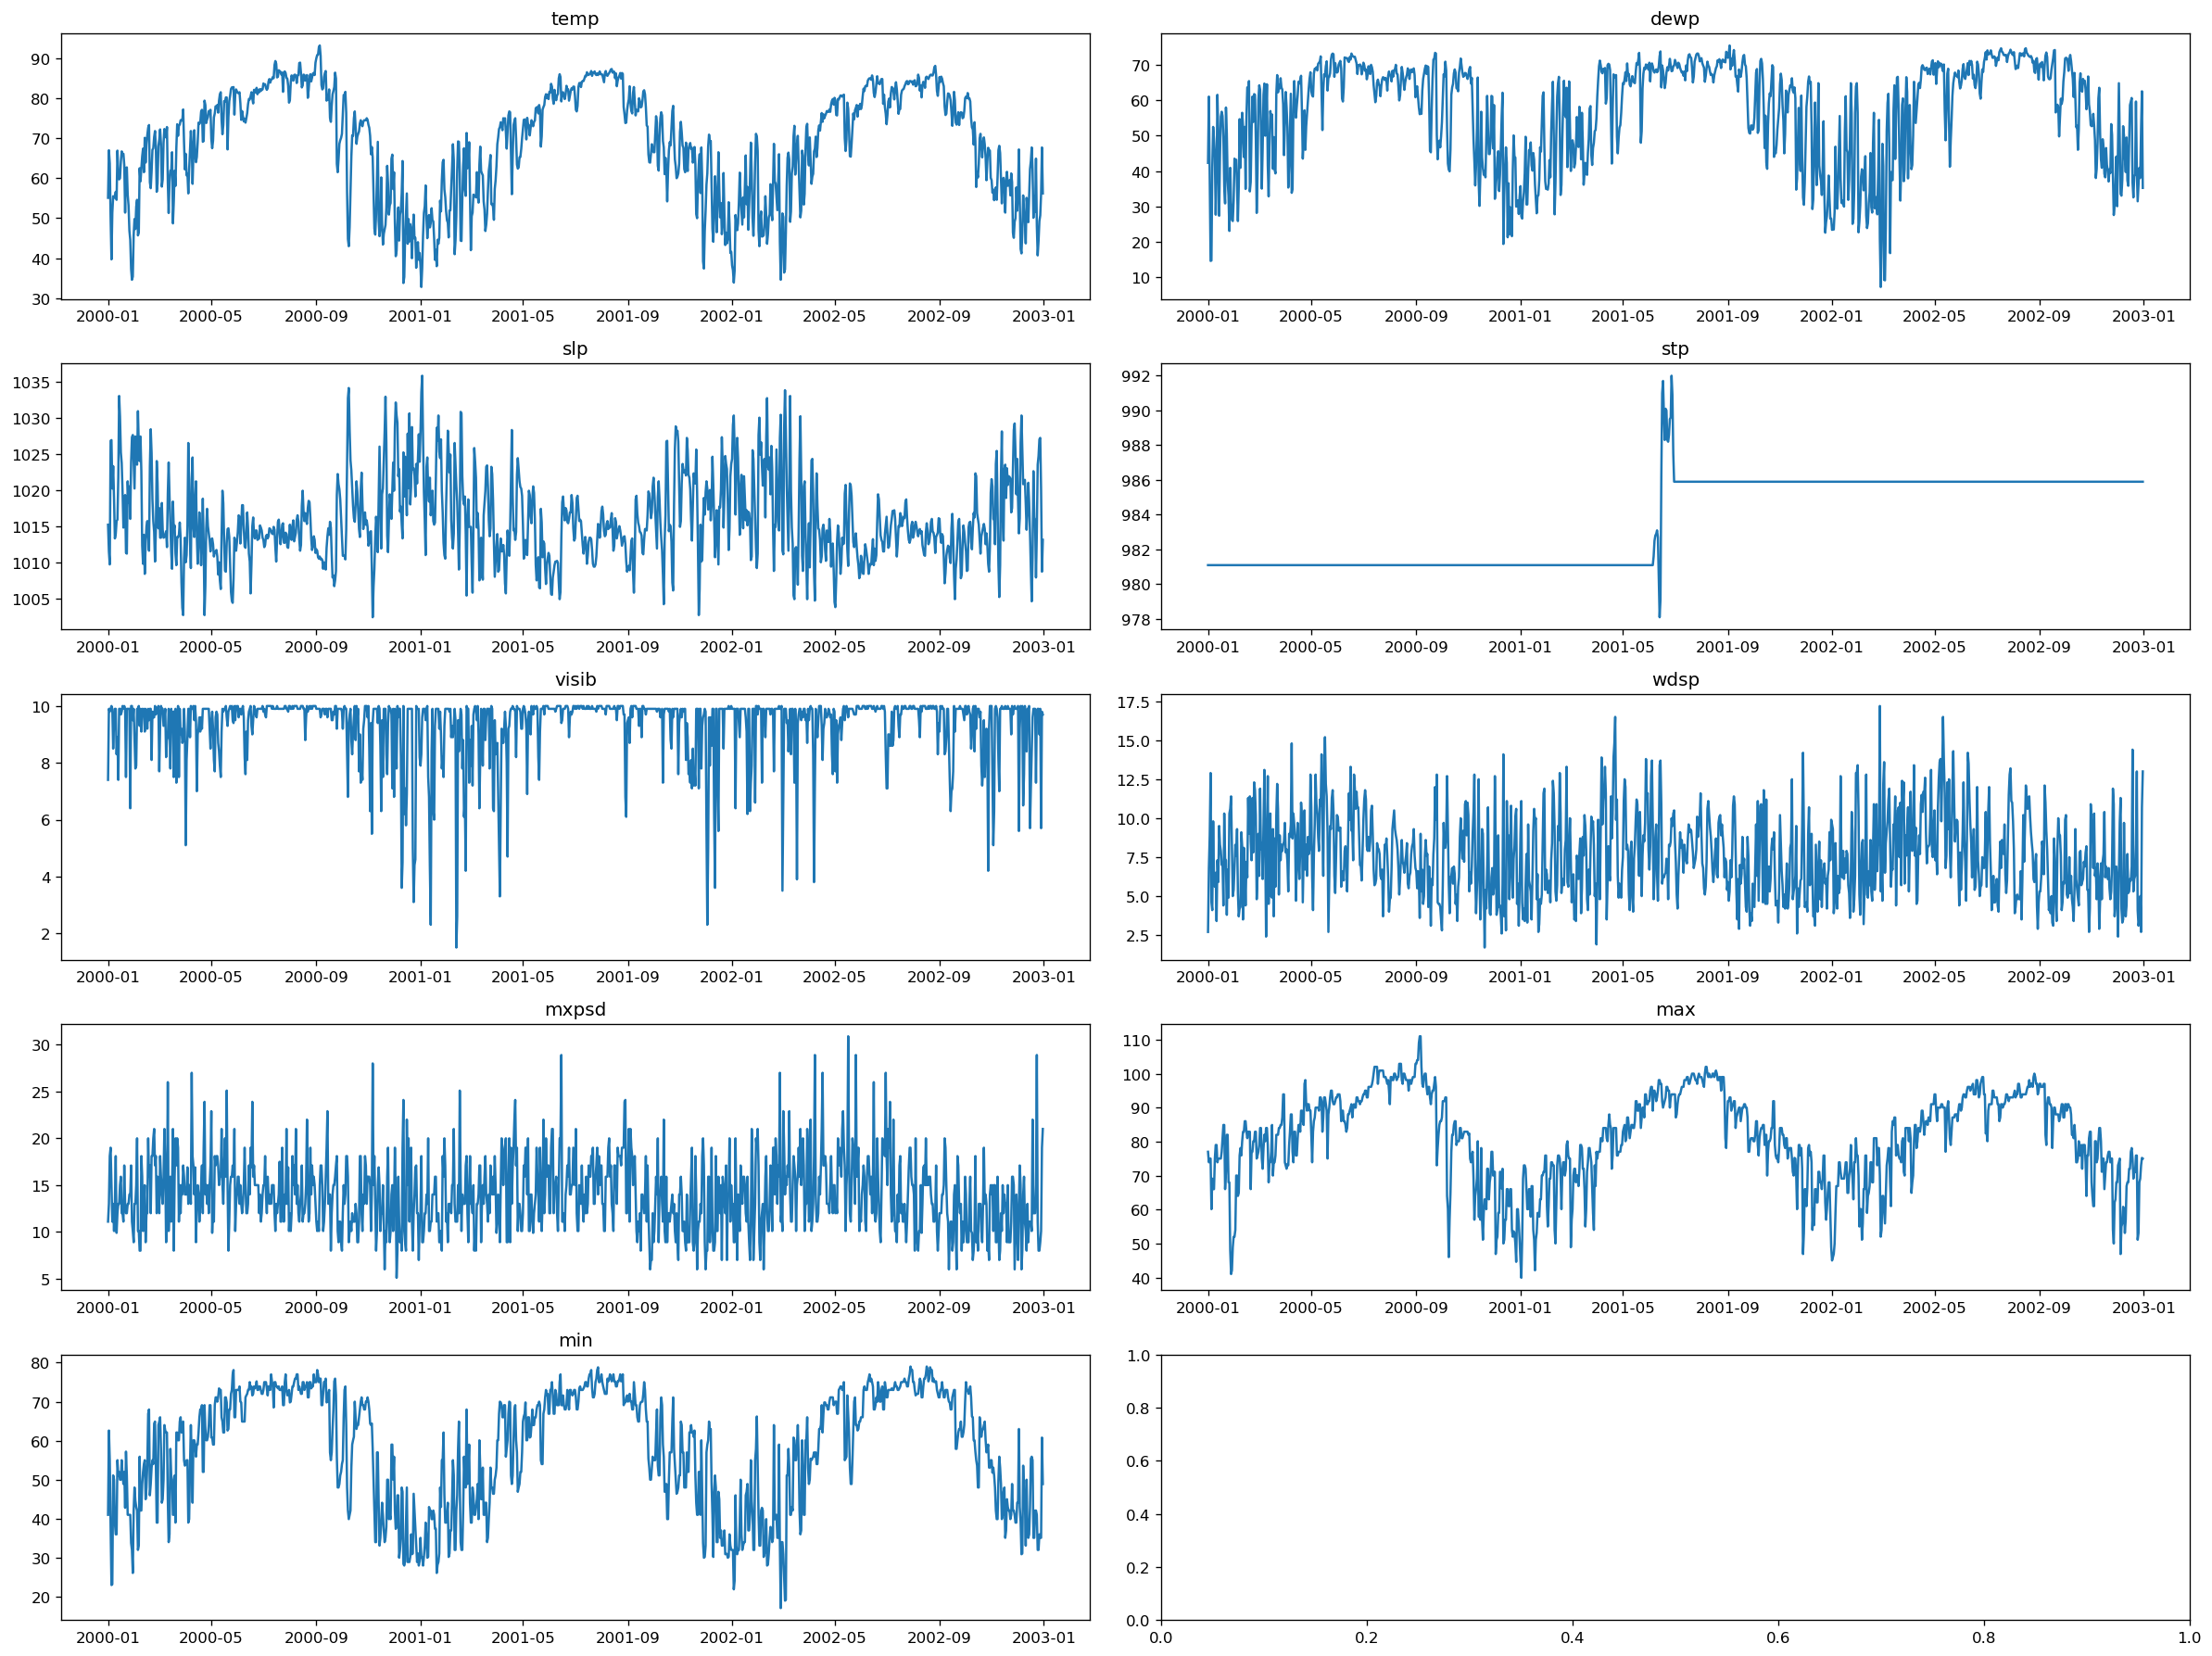

In [96]:
plt.subplots(5, 2, dpi=120, figsize= (20, 15))
plt_ind = 1
for cols in mySet.columns:
    plt.subplot(5, 2, plt_ind)
    plt.plot(mySet[cols]['2000':'2002'])
    plt.title(cols)
    plt_ind += 1

plt.tight_layout()
plt.show()

In [108]:
# There seems to be possible correlation between max and min, temp, dewp, and possibly an inverse relation with slp. Further exploration below.
# There seems to be a strong correlation and it is obvious since it is daily max temp vs daily mean temp
max_temp = mySet[['max', 'temp']]
print(max_temp.corr())

           max      temp
max   1.000000  0.950248
temp  0.950248  1.000000


In [109]:
# There seems to be a high correlation in this case too and its understandable since its daily max temp vs min temp
max_min = mySet[['max', 'min']]
print(max_min.corr())

          max       min
max  1.000000  0.846072
min  0.846072  1.000000


In [110]:
# There seems to strong correlation between max temp and dewp.
max_dewp = mySet[['max', 'dewp']]
print(max_dewp.corr())

           max      dewp
max   1.000000  0.781701
dewp  0.781701  1.000000


In [111]:
# There seems to be a moderate - high negative correlation as was expected from viewing the graphs.
max_slp = mySet[['max', 'slp']]
print(max_slp.corr())

          max       slp
max  1.000000 -0.587689
slp -0.587689  1.000000


In [105]:
# There seems to be a moderate negative correlation.
max_stp = mySet[['max', 'stp']]
print(max_stp.corr())

          max       stp
max  1.000000 -0.501257
stp -0.501257  1.000000


In [106]:
#There is a very weak positive correlation so wdsp will certainly not be considered
max_wdsp = mySet[['max', 'wdsp']]
print(max_wdsp.corr())

           max      wdsp
max   1.000000  0.021076
wdsp  0.021076  1.000000


In [107]:
#There is a very weak positive correlation so visib will certainly not be considered
max_visib = mySet[['max', 'visib']]
print(max_visib.corr())

            max     visib
max    1.000000  0.072831
visib  0.072831  1.000000


In [112]:
#There is a very weak positive correlation so mxpsd will certainly not be considered
max_mxpsd = mySet[['max', 'mxpsd']]
print(max_mxpsd.corr())

            max     mxpsd
max    1.000000  0.070619
mxpsd  0.070619  1.000000


In [113]:
# Using information from the above exploration, to predict daily max temp, (min, temp, slp, dewp, and stp) will be used.

In [114]:
mySet = mySet[['max', 'min', 'temp', 'slp', 'dewp', 'stp']]
mySet.describe()

,max,min,temp,slp,dewp,stp
count,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000,27993.000000
mean,81.334927,58.355682,68.803194,1015.696763,55.357897,987.662391
std,13.318425,14.883111,13.664299,5.663415,15.117477,5.210686
min,21.900000,0.000000,15.700000,989.600000,-10.100000,962.600000
25%,73.000000,46.400000,58.800000,1012.100000,44.400000,984.400000
50%,82.900000,61.000000,71.200000,1015.000000,60.300000,987.100000
75%,91.900000,72.000000,80.600000,1018.700000,68.100000,990.600000
max,111.000000,82.900000,95.400000,1046.700000,77.600000,1016.100000


In [117]:
print(mySet[mySet.columns[0]])

year_mo_da
1946-08-14    98.2
1946-08-15    98.2
1946-08-16    98.2
1946-08-17    98.2
1946-08-18    97.3
              ... 
2023-03-31    87.1
2023-04-01    87.1
2023-04-02    89.1
2023-04-03    91.9
2023-04-04    84.9
Name: max, Length: 27993, dtype: float64


In [119]:
# Now checking each factor for stationarity
for col in mySet.columns:
    adfuller_res = adfuller(mySet[col])
    print(col)
    print(f"ADF Statistic: ", {adfuller_res[0]})
    print(f"p - value: ", {adfuller_res[1]})
    print("\n-----------------------------------\n")

max
ADF Statistic:  {-13.492007589503265}
p - value:  {3.093144813023391e-25}

-----------------------------------

min
ADF Statistic:  {-13.067790705387782}
p - value:  {1.9857357005570753e-24}

-----------------------------------

temp
ADF Statistic:  {-14.026946867394}
p - value:  {3.4896173800357734e-26}

-----------------------------------

slp
ADF Statistic:  {-14.655004016210276}
p - value:  {3.452464198708396e-27}

-----------------------------------

dewp
ADF Statistic:  {-12.422992440280971}
p - value:  {4.097352178493846e-23}

-----------------------------------

stp
ADF Statistic:  {-13.877466442180346}
p - value:  {6.299908994934132e-26}

-----------------------------------



In [120]:
# Since all have p values much lesser than 0.05, they are all stationary.

In [121]:
# Now running Grangers causality test to check for causality/correlation

In [125]:
for i in range(1, len(mySet.columns)):
    print("Does %s cause max?\n" % mySet.columns[i])
    print("--------------------------------")
    test = grangercausalitytests(mySet[['max', mySet.columns[i]]], 4)

Does min cause max?

--------------------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=825.5743, p=0.0000  , df_denom=27989, df_num=1
ssr based chi2 test:   chi2=825.6628, p=0.0000  , df=1
likelihood ratio test: chi2=813.7200, p=0.0000  , df=1
parameter F test:         F=825.5743, p=0.0000  , df_denom=27989, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=566.8352, p=0.0000  , df_denom=27986, df_num=2
ssr based chi2 test:   chi2=1133.8730, p=0.0000  , df=2
likelihood ratio test: chi2=1111.5092, p=0.0000  , df=2
parameter F test:         F=566.8352, p=0.0000  , df_denom=27986, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=524.4206, p=0.0000  , df_denom=27983, df_num=3
ssr based chi2 test:   chi2=1573.6553, p=0.0000  , df=3
likelihood ratio test: chi2=1531.0094, p=0.0000  , df=3
parameter F test:         F=524.4206, p=0.0000  , df_denom=27983, df_num=3

Granger Causality
numbe

In [126]:
# Since p values for all are lesser than 0.05, causality/correlation is true for all factors considered. The p values are most likely 0 due to large dataset being used which makes it easier to test for correlation.

In [154]:
# splitting dataset into train and test
testLength = 10
train, test = mySet[27000:len(mySet) - testLength], mySet[len(mySet) - testLength:]
print(f"Shape of train: ", {train.shape})
print(f"Shape of test: ", {test.shape})

Shape of train:  {(983, 6)}
Shape of test:  {(10, 6)}


In [155]:
# fitting model with different lags to determine order for VAR model.
model = VAR(train)
findOrder = model.select_order(maxlags=50)
print(findOrder.summary())

C:\Users\Hani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        18.69       18.72   1.310e+08       18.70
1        14.62       14.84   2.242e+06       14.71
2        14.35      14.75*   1.707e+06       14.50
3       14.26*       14.85  1.560e+06*      14.49*
4        14.26       15.04   1.565e+06       14.56
5        14.29       15.26   1.614e+06       14.66
6        14.31       15.47   1.648e+06       14.75
7        14.36       15.70   1.728e+06       14.87
8        14.35       15.88   1.713e+06       14.93
9        14.35       16.06   1.699e+06       15.00
10       14.37       16.27   1.738e+06       15.09
11       14.38       16.47   1.765e+06       15.18
12       14.37       16.64   1.745e+06       15.24
13       14.39       16.85   1.786e+06       15.33
14       14.42       17.07   1.844e+06       15.43
15       14.43       17.26   1.860e+06       15.51
16       14.45       17.47   1.

In [156]:
# The order chosen is 3 since AIC value is lowest and remains unchanged after.
var_model = VARMAX(train, order=(3,0), enforce_stationarity=True)
model_fit = var_model.fit(disp=False)
print(model_fit.summary())

C:\Users\Hani\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                        Statespace Model Results                                        
Dep. Variable:     ['max', 'min', 'temp', 'slp', 'dewp', 'stp']   No. Observations:                  983
Model:                                                   VAR(3)   Log Likelihood              -15271.706
                                                    + intercept   AIC                          30813.411
Date:                                          Sun, 09 Apr 2023   BIC                          31473.644
Time:                                                  01:08:24   HQIC                         31064.555
Sample:                                              07-16-2020                                         
                                                   - 03-25-2023                                         
Covariance Type:                                            opg                                         
Ljung-Box (L1) (Q):     0.11, 0.76, 0.93, 1.37, 0.02, 0

In [160]:
numForecast = 10
predict = model_fit.get_prediction(start=len(train), end=len(train)+numForecast-1)
predictions = predict.predicted_mean
predictions.columns = ['max_pred', 'min_pred', 'temp_pred', 'slp_pred', 'dewp_pred', 'stp_pred']
predictions

,max_pred,min_pred,temp_pred,slp_pred,dewp_pred,stp_pred
2023-03-26,83.301199,47.522100,63.425204,1014.738703,31.088529,986.188638
2023-03-27,81.832912,50.554263,66.363477,1016.543490,41.586303,987.395675
2023-03-28,82.957498,52.179403,67.049941,1016.506664,45.205742,987.956930
2023-03-29,82.608581,52.693417,66.628448,1015.844969,46.877888,987.686582
2023-03-30,82.038740,53.434111,66.843279,1015.579366,48.588858,987.468381
2023-03-31,81.614275,54.027214,66.927767,1015.906254,49.446905,987.731930
2023-04-01,81.298455,54.358735,66.862210,1016.171933,50.019876,987.954336
2023-04-02,81.222709,54.709568,67.002382,1016.110138,50.807580,987.902210
2023-04-03,81.287620,55.145430,67.225704,1015.976094,51.485733,987.782426
2023-04-04,81.329194,55.494804,67.354283,1015.941138,51.848192,987.740988


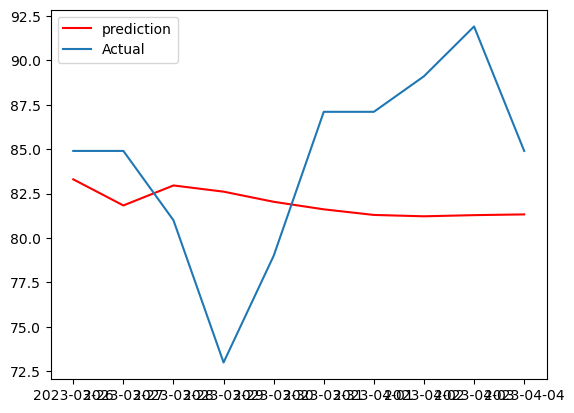

In [161]:
plt.plot(predictions['max_pred'], color='red', label='prediction')
plt.plot(test['max'], label='Actual')
plt.legend()
plt.show()

In [162]:
print(mean_squared_error(test['max'], predictions['max_pred']))

36.852984793531164
